In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [5]:
df.shape

(3000, 3)

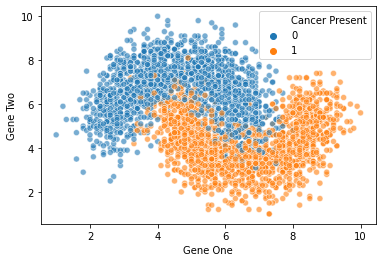

In [6]:
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue = 'Cancer Present', alpha=0.6)
#plt.xlim(2,6)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model.predict(scaled_X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_test, y_pred)

0.8922222222222222

In [18]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



### Elbow method for choosing the reasonable k-values

In [20]:
error_rate = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    error_rate.append(test_error)

Text(0, 0.5, 'Error rates')

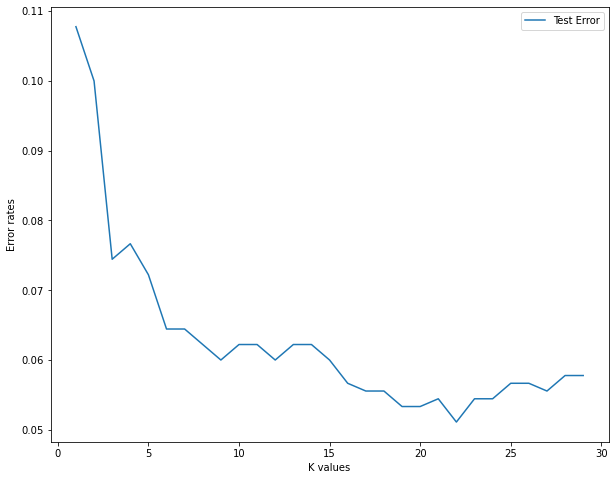

In [21]:
plt.figure(figsize=(10,8))

plt.plot(range(1,30), error_rate, label='Test Error')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Error rates')

### Full CV using grid search for finding the best K


In [22]:
scaler = StandardScaler()

In [23]:
knn = KNeighborsClassifier()

In [24]:
##help(KNeighborsClassifier)

In [25]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [26]:
### Highly recommend string code matches the variable name!!!!!



operations = [('scalar', scaler), ('knn', knn)]

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline(operations)

In [29]:
from sklearn.model_selection import GridSearchCV

If your parameter grid is going inside a pipeline, the parameter name should be specified as:


model_name+__+ parameter name


In [30]:
k_values = list(range(1,20))

In [31]:
param_grid = {'knn__n_neighbors': k_values}

In [32]:
full_cv_classifier = GridSearchCV(pipe,param_grid, cv=5, scoring='accuracy')

In [33]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [34]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [35]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90238095, 0.90285714, 0.91857143, 0.91333333, 0.92380952,
       0.92142857, 0.9252381 , 0.9247619 , 0.9252381 , 0.92190476,
       0.9252381 , 0.9247619 , 0.92761905, 0.92904762, 0.92809524,
       0.92809524, 0.92904762, 0.92857143, 0.92761905])

In [36]:
## Final Model
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scalar', scaler), ('knn14', knn14)]

In [37]:
pipe = Pipeline(operations)

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [39]:
pipe_pred = pipe.predict(X_test)

In [40]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [41]:
new = [[4.3, 6.8]]

In [42]:
pipe.predict(new)

array([0], dtype=int64)